LOGISTIC REGRESSION -- IT WORKS ON CATEGORICAL DATA.

CLASSIFICATION TYPES --

1. BINARY CLASSIFICATION -- 
When we want to predict only YES/NO.
EXAMPLE - Will a customer buy life insurance(YES/NO)?


2. Multiclass Classification --
When we want to predict a specific value.
Example--
Which party a person is going to vote for?

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt


In [3]:
Data = pd.read_csv('insurance_data.csv')
print(Data)

    age  insurance
0    22          0
1    25          0
2    47          1
3    52          0
4    46          1
5    56          1
6    55          0
7    60          1
8    62          1
9    61          1
10   18          0
11   28          0
12   27          0
13   29          0
14   49          1
15   55          1
16   25          1
17   58          1
18   19          0
19   18          0
20   21          0
21   26          0
22   40          1
23   45          1
24   50          1
25   54          1
26   23          0


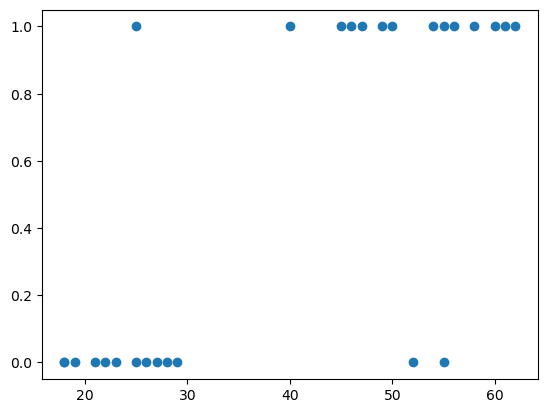

In [4]:
plt.scatter(Data['age'],Data['insurance'])

We can see that the data is not linear there is no pattern in the data so we will use logistic regression.

In [5]:
from sklearn.model_selection import train_test_split

USING TRAIN_TEST_SPLIT TO SPLIT THE DATA--


In [6]:
x_train,x_test,y_train,y_test=train_test_split(Data[['age']],Data[['insurance']],test_size = 0.1)

In [7]:
print(x_train)

    age
3    52
9    61
1    25
4    46
15   55
22   40
19   18
10   18
13   29
5    56
24   50
23   45
21   26
7    60
26   23
0    22
20   21
8    62
18   19
25   54
14   49
2    47
12   27
17   58


Now importing logistic regression--

In [8]:
from sklearn import linear_model
model = linear_model.LogisticRegression()

In [9]:
model.fit(x_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [10]:
print(x_test)

    age
6    55
11   28
16   25


In [11]:
model.predict(x_test)

array([1, 0, 0], dtype=int64)

In [12]:
model.score(x_test,y_test)

0.3333333333333333

IMPORTING ANOTHER DATA--

In [13]:
HR_Data = pd.read_csv('HR_comma_sep.csv')
print(HR_Data)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

Preprocessing the data because there are string values using one hot encoder-

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
df = HR_Data
df.Department = le.fit_transform(df.Department)
df.salary = le.fit_transform(df.salary)
print(df['salary'])

0        1
1        2
2        2
3        0
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: salary, Length: 14999, dtype: int32


NOW MAKING THE DATA IN PARTS FOR TRAINING AND TESTING--

In [16]:
x_train,x_test,y_train,y_test = train_test_split(df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','salary']],df[['left']])

In [17]:
model.fit(x_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
print(x_test)

       satisfaction_level  last_evaluation  number_project  \
2885                 0.68             0.84               3   
5850                 0.83             0.75               3   
3960                 0.50             0.55               3   
14539                0.10             0.85               6   
10904                0.58             0.86               4   
...                   ...              ...             ...   
3174                 0.71             0.64               4   
3172                 0.75             0.56               4   
2471                 0.53             0.69               4   
6296                 0.77             0.68               5   
9249                 0.98             0.89               3   

       average_montly_hours  time_spend_company  Work_accident  \
2885                    239                   2              0   
5850                    150                   3              0   
3960                    188                   2          

In [20]:
model.predict([[0.2,0.3,5,140,0,0,1,2]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [ ]:
model.score(x_test,y_test)

0.7608